<h4>Model fitting and selection</h4>
<h4>For Model fitting, we will try a couple of different machine learning algorithms in order to get an idea about which machine learning algorithm performs better.Since this is a classification problem,we will try the following algorithms :</h4>
<h4>1. Logistic Regression</h4>
<h4>2. Logistic Regression with degree 2 polynomial kernel</h4>
<h4>3.SVM with Rbf kernel and poly kernel</h4>
<h4>4. Random Forest Classifier</h4>
<h4>5. Extreme Gradient Boosting Classifier</h4>

In [25]:
import numpy as np 
import pandas as pd 
#visualization 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [17]:
df=pd.read_csv('After_feature_engineering_selection.csv')

In [64]:
X = df.drop('Exited',axis='columns')
y = df['Exited']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

<h4>Calculating feature importance in our dataset </h4>

In [20]:

features_label = X_train.columns
forest = RandomForestClassifier (n_estimators = 1000, random_state = 0, n_jobs = -1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

 1) CreditScore                    0.158857
 2) Geography                      0.133626
 3) Gender                         0.125614
 4) Age                            0.096455
 5) Tenure                         0.092560
 6) Balance                        0.085990
 7) NumOfProducts                  0.082179
 8) HasCrCard                      0.075681
 9) IsActiveMember                 0.046045
10) EstimatedSalary                0.039549
11) BalanceSalaryRatio             0.031732
12) TenureByAge                    0.017455
13) CreditScoreGivenAge            0.014256


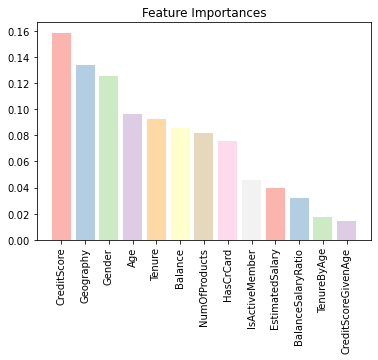

In [30]:
# Visualization of the Feature importances
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color = sns.color_palette("Pastel1"), align = "center")
plt.xticks(range(X_train.shape[1]), features_label, rotation = 90)
plt.show()

In [56]:

# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

<h4>Fitted different models to GridSearchCV to find out the best parameters.</h4>
<h4>Fitting our training dataset with the model with best parameters got from GridSearchCV for each of the machine learning techniques.</h4>

In [32]:
# Fit primal logistic regression
#lbfgs is given to handle l2 penalty 

log_primal = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='auto',n_jobs=-1, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(X_train,y_train)

LogisticRegression(C=10, max_iter=250, n_jobs=-1, tol=1e-05)

In [66]:
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(X_train)

In [33]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(X_train)
log_pol2 = LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='auto', n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(df_train_pol2,y_train)

LogisticRegression(C=50, max_iter=300, solver='liblinear')

In [34]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=150, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(X_train,y_train)

SVC(C=150, gamma=0.1, probability=True)

In [36]:
# Fit SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(X_train,y_train)

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

In [37]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=7, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=7, min_samples_split=3)

In [38]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=5,
                    min_child_weight=1, missing=None, n_estimators=100,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None,  subsample=1)
XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=0, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

<h4>Reviewing best model fit accuracy. Our keen interest is on the performance in predicting 1's (Customers who churn) as the data is unbalance hence we will go with the precision and recall scores to keep the false positives and false negatives in check</h4> 

In [39]:
# Normal logistic regression
print(classification_report(y_train, log_primal.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      6368
           1       0.69      0.20      0.31      1632

    accuracy                           0.82      8000
   macro avg       0.76      0.59      0.60      8000
weighted avg       0.80      0.82      0.78      8000



In [40]:
# Logistic Regression with degree 2 polynomial kernel
print(classification_report(y_train,  log_pol2.predict(df_train_pol2)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6368
           1       0.77      0.46      0.58      1632

    accuracy                           0.86      8000
   macro avg       0.82      0.71      0.75      8000
weighted avg       0.85      0.86      0.85      8000



In [41]:
# SVM with RBF kernel
print(classification_report(y_train,  SVM_RBF.predict(X_train)))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6368
           1       0.83      0.41      0.55      1632

    accuracy                           0.86      8000
   macro avg       0.85      0.69      0.73      8000
weighted avg       0.86      0.86      0.84      8000



In [42]:
# SVM with polynomial kernel
print(classification_report(y_train,  SVM_POL.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      6368
           1       0.86      0.35      0.50      1632

    accuracy                           0.86      8000
   macro avg       0.86      0.67      0.71      8000
weighted avg       0.86      0.86      0.83      8000



In [43]:
# Random Forest Classifier
print(classification_report(y_train,  RF.predict(X_train)))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      6368
           1       0.89      0.49      0.63      1632

    accuracy                           0.88      8000
   macro avg       0.89      0.74      0.78      8000
weighted avg       0.88      0.88      0.87      8000



In [44]:
# Xtreme Gradient Boosting
print(classification_report(y_train,  XGB.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6368
           1       0.86      0.55      0.67      1632

    accuracy                           0.89      8000
   macro avg       0.88      0.76      0.80      8000
weighted avg       0.89      0.89      0.88      8000



<h4>Clearly XG Boost is giving the best training data acuracy of 89% for our dataset.</h4>
<h4>Checking accuracy for test data with XG Boost Model</h4>

In [46]:
print(classification_report(y_test,  XGB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.73      0.45      0.56       405

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.74      2000
weighted avg       0.84      0.85      0.84      2000



<h4>Final accuracy for the test data is coming to be 85 % which is quite good but as we have seen that our dataset is a little imbalanced thats why our accuracy for customers who had exited is coming low.</h4>

<h3>Handling the problem of Imbalanced dataset</h3>

Removing the imbalance of our dataset by SMOTE oversampling technique

In [73]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

<h4>Now we have equal number of churned and retaining customers</h4>

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

<h4>Fitting with the XGB model generated using GridSearchCV.</h4>

In [50]:
XGB2 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.2, max_delta_step=0,max_depth=7,
                    min_child_weight=1, missing=None, n_estimators=100,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None,  subsample=1)
XGB2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=0, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [51]:

print(classification_report(y_train,  XGB2.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      6370
           1       0.98      0.95      0.97      6370

    accuracy                           0.97     12740
   macro avg       0.97      0.97      0.97     12740
weighted avg       0.97      0.97      0.97     12740



<h4>Training set accuracy is coming to be 97 % which is great in itself.</h4>

In [53]:
print(classification_report(y_test, XGB2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1593
           1       0.93      0.87      0.90      1593

    accuracy                           0.90      3186
   macro avg       0.91      0.90      0.90      3186
weighted avg       0.91      0.90      0.90      3186



<h4>Testing set accuracy is coming to be 90 % which has increased from 89% which we got in from our previous XGB model</h4> 

In [ ]:
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [59]:
log_primal.predict_proba(X)[:,1]

array([0.14835342, 0.2288433 , 0.44843757, ..., 0.07663734, 0.26412784,
       0.10739949])

In [61]:
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])

In [70]:
X = df.drop('Exited',axis='columns')
y = df['Exited']
X_pol2 = df_train_pol2
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict(X),SVM_POL.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])

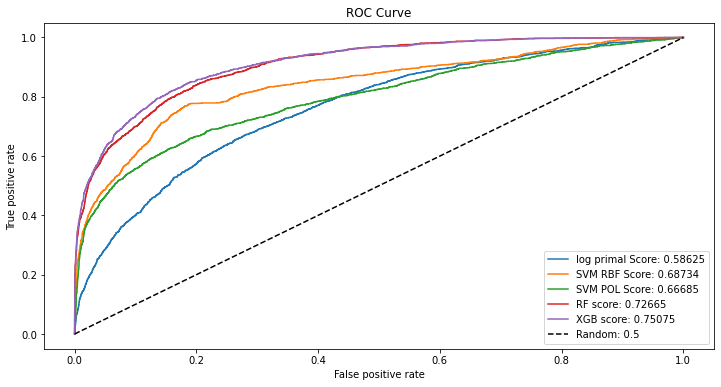

In [72]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

In [84]:
from sklearn.feature_selection import RFECV
sel_ = RFE(XGB2)
sel_.fit(X_train, y_train)

RFE(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                            colsample_bylevel=1, colsample_bynode=1,
                            colsample_bytree=1, gamma=0.01, gpu_id=-1,
                            importance_type='gain', interaction_constraints='',
                            learning_rate=0.2, max_delta_step=0, max_depth=7,
                            min_child_weight=1, missing=None,
                            monotone_constraints='()', n_estimators=100,
                            n_jobs=1, nthread=1, num_parallel_tree=1,
                            random_state=0, reg_alpha=0, reg_lambda=1,
                            scale_pos_weight=1, seed=0, subsample=1,
                            tree_method='exact', validate_parameters=1,
                            verbosity=None))

In [85]:
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

6

In [86]:
selected_feat

Index(['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts',
       'IsActiveMember'],
      dtype='object')

In [89]:
print(classification_report(y_train, sel_.predict(X_train)))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6370
           1       0.96      0.89      0.92      6370

    accuracy                           0.93     12740
   macro avg       0.93      0.93      0.93     12740
weighted avg       0.93      0.93      0.93     12740



In [88]:
print(classification_report(y_test, sel_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1593
           1       0.94      0.86      0.90      1593

    accuracy                           0.90      3186
   macro avg       0.91      0.90      0.90      3186
weighted avg       0.91      0.90      0.90      3186



In [90]:
import joblib 
  

joblib.dump(XGB2, 'sel_.pkl') 
  
    

['sel_.pkl']